### 3. Problem Statement 

Write a Python program to draw (visualize) the architecture of a Neural Network used to classify fraudulent and non-fraudulent credit card transactions. 

Assume the fraud detection dataset contains the following input features: 

1. TransactionAmount
2. TransactionTime
3. MerchantCategory
4. CustomerAge
5. AccountBalance
6. NumberOfTransactionsToday
7. Fraud (0 = Genuine, 1 = Fraud) 

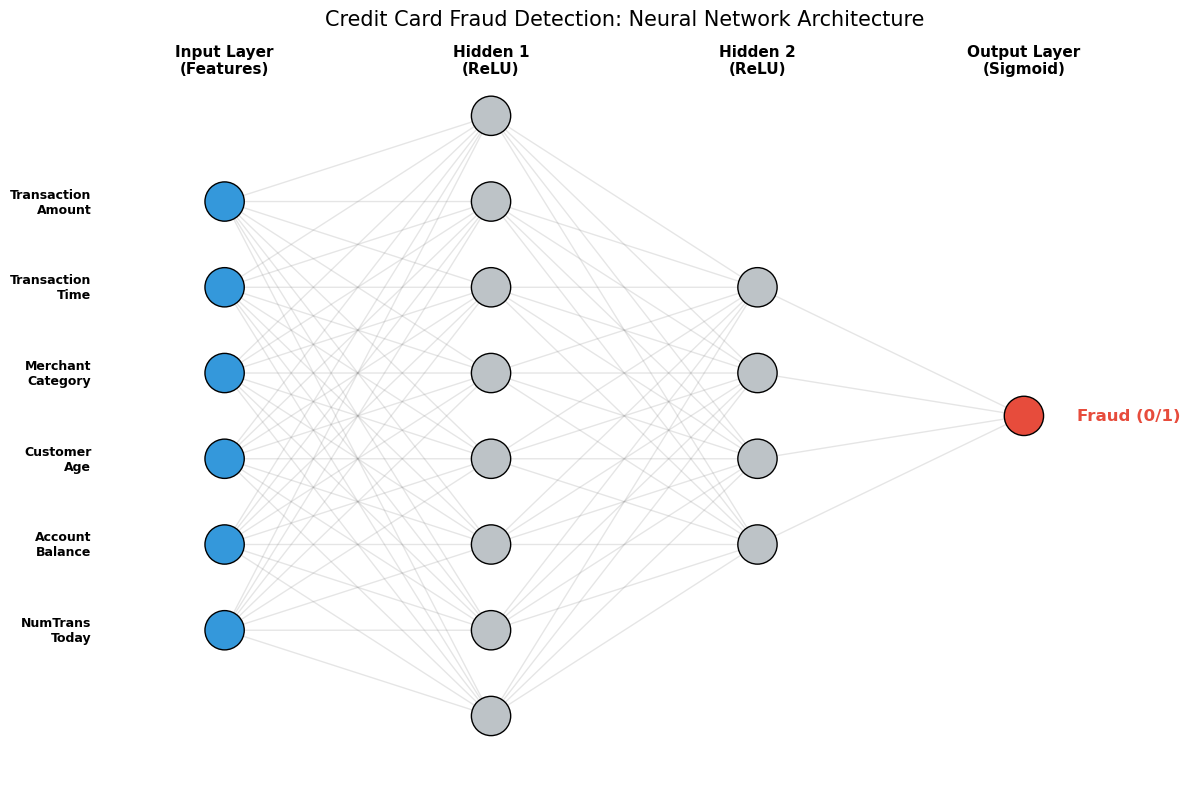

In [216]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_fraud_nn():
    # Define layer sizes
    layers = [6, 8, 4, 1]
    feature_names = [
        "Transaction\nAmount", "Transaction\nTime", "Merchant\nCategory",
        "Customer\nAge", "Account\nBalance", "NumTrans\nToday"
    ]

    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # 1. Create Nodes and Positions
    for i, layer_size in enumerate(layers):
        for j in range(layer_size):
            node_id = f"L{i}_{j}"
            G.add_node(node_id)
            # x position is the layer index, y is centered vertically
            pos[node_id] = (i, -j + (layer_size / 2))
            
            # Color assignment
            if i == 0: node_colors.append('#3498db') # Blue for Input
            elif i == len(layers) - 1: node_colors.append('#e74c3c') # Red for Output
            else: node_colors.append('#bdc3c7') # Grey for Hidden

    # 2. Create Edges (Fully Connected)
    for i in range(len(layers) - 1):
        for j in range(layers[i]):
            for k in range(layers[i+1]):
                G.add_edge(f"L{i}_{j}", f"L{i+1}_{k}")

    # 3. Plotting
    plt.figure(figsize=(12, 8))
    
    # Draw edges with low alpha to avoid clutter
    nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray', arrows=True, arrowsize=10)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, edgecolors='black')

    # 4. Labeling
    # Label Input Features
    for j, name in enumerate(feature_names):
        plt.text(pos[f"L0_{j}"][0]-0.5, pos[f"L0_{j}"][1], name, 
                 fontsize=9, ha='right', va='center', fontweight='bold')

    # Label Output
    plt.text(pos[f"L{len(layers)-1}_0"][0]+0.2, pos[f"L{len(layers)-1}_0"][1], 
             "Fraud (0/1)", fontsize=12, ha='left', va='center', color='#e74c3c', fontweight='bold')

    # Add Titles for Layers
    layer_labels = ["Input Layer\n(Features)", "Hidden 1\n(ReLU)", "Hidden 2\n(ReLU)", "Output Layer\n(Sigmoid)"]
    for i, label in enumerate(layer_labels):
        plt.text(i, 4.5, label, fontsize=11, ha='center', fontweight='bold')

    plt.title("Credit Card Fraud Detection: Neural Network Architecture", fontsize=15, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Run the visualizer
draw_fraud_nn()